### 0. import raw data

gdp index 2019 = 100

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def parser(x):
    return datetime.strptime('%Y-%m')

df0 = pd.read_excel(r"C:\Users\jenna.chang\OneDrive - Accenture\Desktop\MacroEcon_data\GDP.xlsx", header=0, parse_dates=[0], index_col=0)
df0.head()

,gdp,gdp_m%,gdp_m%_1y,gdp_3m%_1y,gdp_3m%
mm-yy,,,,,
2021-01-01,89.6,-2.9,-11.1,-0.9,-9.6
2021-02-01,90.2,0.7,-10.0,-1.0,-9.7
2021-03-01,92.2,2.3,-1.0,-1.2,-7.5
2021-04-01,95.1,3.1,29.1,1.8,3.9
2021-05-01,96.3,1.3,26.8,4.3,16.9


In [21]:
# convert first column to a datetime column
#df0[["mm-yy"]] = df0[["mm-yy"]].apply(pd.to_datetime)
#df0.head()
# choose gdp
df = df0[['gdp']]
df.head()
#print (df.dtypes)

,gdp
mm-yy,
2021-01-01,89.6
2021-02-01,90.2
2021-03-01,92.2
2021-04-01,95.1
2021-05-01,96.3


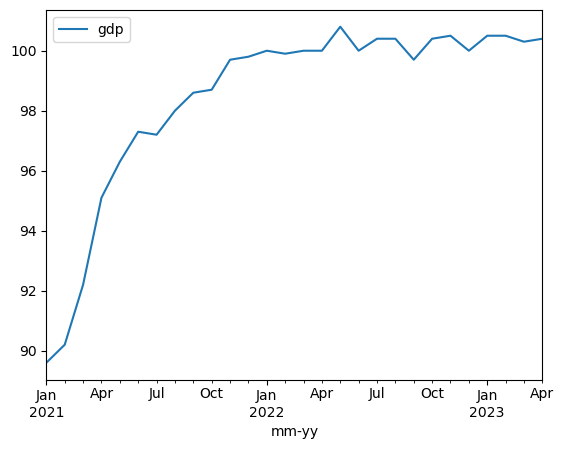

In [22]:
# Plotting the time series of given dataframe
#plt.plot(df_gdp[["mm-yy"]], df_gdp[["gdp"]] )
#plt.rcParams['figure.figsize'] =(9,3)
#plt.show()
from matplotlib import pyplot
df.plot()
pyplot.show()

### 1. interpolate monthly to weekly data

interpolate methods : https://docs.scipy.org/doc/scipy/tutorial/interpolate.html

###  1.1 constructing new data points - days

In [23]:
len(df["gdp"])
df["gdp"].head()

mm-yy
2021-01-01    89.6
2021-02-01    90.2
2021-03-01    92.2
2021-04-01    95.1
2021-05-01    96.3
Name: gdp, dtype: float64

                  gdp
mm-yy                
2021-01-01  89.600000
2021-01-02  89.590968
2021-01-03  89.583893
2021-01-04  89.578767
2021-01-05  89.575583
                   gdp
mm-yy                 
2023-03-28  100.352784
2023-03-29  100.363418
2023-03-30  100.374822
2023-03-31  100.387011
2023-04-01  100.400000
<class 'pandas.core.frame.DataFrame'>


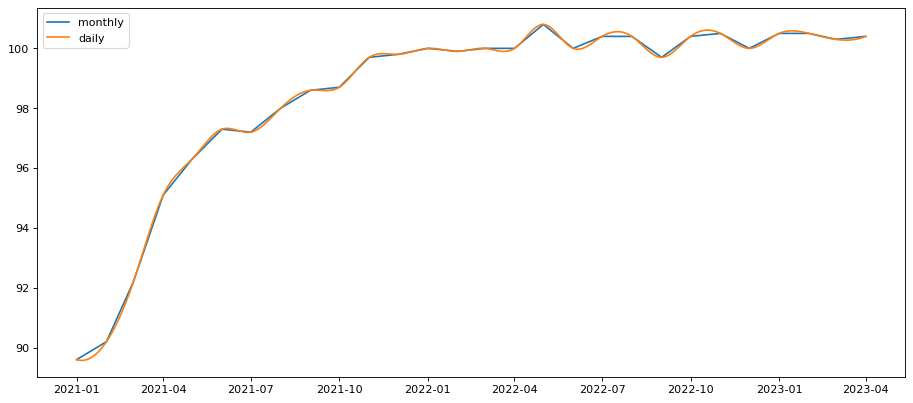

In [24]:
from scipy.interpolate import CubicSpline, interp1d
upsample_cubic = df.resample('D').asfreq().interpolate(method='cubic', axis=0, order=2)
print(upsample_cubic.head())
print(upsample_cubic.tail())
print(type(upsample_cubic))
#upsample_s.plot()
#x = df.index.values.astype('d') #convert mm-yy back to float

from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=80)

plt.plot(df["gdp"], label = "monthly")
plt.plot(upsample_cubic, label = "daily")
plt.legend()
plt.show()

### 2. Generate the analytical data - daily gdp

In [25]:
#change date index name 
upsample_cubic.index.names = ['yyyy-mm-dd']
print(upsample_cubic.index) 

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
               '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
               '2023-03-31', '2023-04-01'],
              dtype='datetime64[ns]', name='yyyy-mm-dd', length=821, freq='D')


## 3.output daily data to a new spreadsheet

In [26]:
upsample_cubic.index = upsample_cubic.index.date
upsample_cubic.to_excel('daily - gdp.xlsx')